In [1]:
#Commande pour Vic/Gulliver dans le terminal

#   pip install gtfs_function
#   pip install GeoPandas


import gtfs_functions as gtfs
import matplotlib
import geopandas

routes, stops, stop_times, trips, shapes = gtfs.import_gtfs("gtfs3Sept.zip")
stop_freq = gtfs.stops_freq(stop_times, stops)
line_freq = gtfs.lines_freq(stop_times, trips, shapes, routes)




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import random

In [3]:
stops[stops['stop_name']=='HEROS']
len(stop_times[(stop_times['stop_id']=='5026') & (stop_times['route_id']=='10')])

#10 = route_id du 4

151

In [4]:
def from_sec_to_hours(CountInSec):
    hours = int(CountInSec//3600)
    ReminderHour = CountInSec%3600
    minutes = int(ReminderHour//60)
    seconds = int(ReminderHour%60)
    time = str(hours)+':'+str(minutes)+':'+str(seconds)
    return time

In [5]:
from_sec_to_hours(31920.0)

'8:52:0'

In [6]:
stop_freq_window0_6 = stop_freq[stop_freq["window"]=='0:00-6:00']   #Ici on remarque que il n'y a que certaines ligne qui ont un crénau '0:00-6:00'
stop_freq_window0_6 = stop_freq[stop_freq["window"]=='9:00-15:00']  #Pareil pour heure de pointe

Début d'un exemple sur un arrêt spécifique d'une ligne. Je commence par choisir un arrêt quelconque au hasard 

In [7]:
from random import sample

random.seed(12)                         #Only to assure that we still have the same 'random' number for the computation

#StopIdExample = sample(list(stops['stop_id']),1)[0]
StopIdExample = '5026'   #arrêt Heros sur la ligne du 4
StopIdExample 

'5026'

Pour y voir plus clair on peut chercher le nom de cet arrêt

In [8]:
NameStopExample = stops[stops['stop_id']==StopIdExample]['stop_name']    
NameStopExample                                                         #The number on the left indicate the number of the row in the DataFrame 'stops'

1611    HEROS
Name: stop_name, dtype: object

Maitenant il s'agit de chercher quelles sont les lignes qui passent par cet arrêt

In [9]:
TripsStoppingAtExample = stop_times[stop_times['stop_id']==StopIdExample]['trip_id'].unique()  #All the trip_id that are passing by StopIdExample

    #Here the .unique() command shows us only once a trip_id
    #Now we identify the (possibly) different route that are passing by 

RoutesContainingStopExample = [trips[trips['trip_id']==Trip]['route_id'].unique()[0] for Trip in TripsStoppingAtExample]
    #I transform it again in Data Frame so thta I can filter routes that appear twice or more
RoutesContainingStopExample = pd.DataFrame({'Routes':RoutesContainingStopExample})
RoutesContainingStopExample = RoutesContainingStopExample['Routes'].unique()
RoutesContainingStopExample

array(['7', '10', '15'], dtype=object)

Ici on voit ducoup qu'il n'y a qu'une ligne qui passe par cette arrêt Wagon, c'est celle dont le route_id est '67'. De mémoire c'est le 4 Stalle-Gare du Nord qui passe par
là comme c'est mon trajet pour aller à l'unif mdr, on peut vérifier ça 

In [10]:
NameOfLine = [routes[routes['route_id']==route]['route_long_name'] for route in RoutesContainingStopExample] 
NameOfLine

[70    SCHAERBEEK GARE - FORT-JACO
 Name: route_long_name, dtype: object,
 3    GARE DU NORD - STALLE (P)
 Name: route_long_name, dtype: object,
 36    STADE - VAN HAELEN
 Name: route_long_name, dtype: object]

In [11]:
stop_times[(stop_times['stop_name']=='HEROS') & (stop_times['route_id']=='10')]['stop_id'].unique() #5058F
stop_times[(stop_times['stop_id']=='5026') & (stop_times['route_id']=='10')]['direction_id'].unique()
stop_times[(stop_times['stop_id']=='5058F') & (stop_times['route_id']=='10')]['direction_id'].unique()


array([1], dtype=int64)

C'est pas du tout la ligne que je pensais mdr, mais enfait il y a plusieurs arrêt qui porte le même nom du coup, d'où l'importance d'avoir des id et pas simplement des noms de stop.
Après vérification l'arrêt Wagon qui est traversé par le 4 a le stop_id '5917F', quick check:

In [12]:
stops[stops['stop_id']=='5917F']['stop_name']

1936    WAGON
Name: stop_name, dtype: object

Bref ce qui nous intéresse, c'est d'avoir les passages à cet arrêt, et en particulier les différents temps d'attente. Regardons à ça :

In [13]:
stop_times[(stop_times['stop_id']==StopIdExample) & (stop_times['direction_id']==0)].head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,route_id,service_id,direction_id,shape_id,stop_code,stop_name,stop_desc,zone_id,stop_url,location_type,parent_station,geometry
281587,113374536237645001,87600.0,87600.0,5026,4,0,0,7,237645001,0,092t0150,NaN,HEROS,NaN,NaN,NaN,0,NaN,POINT (4.34136 50.80331)
281600,113374538237645001,88500.0,88500.0,5026,4,0,0,7,237645001,0,092t0150,NaN,HEROS,NaN,NaN,NaN,0,NaN,POINT (4.34136 50.80331)
281613,113374603237645001,86700.0,86700.0,5026,4,0,0,7,237645001,0,092t0150,NaN,HEROS,NaN,NaN,NaN,0,NaN,POINT (4.34136 50.80331)
281626,113374615237645001,20460.0,20460.0,5026,4,0,0,7,237645001,0,092t0150,NaN,HEROS,NaN,NaN,NaN,0,NaN,POINT (4.34136 50.80331)
281639,113374616237645001,21420.0,21420.0,5026,4,0,0,7,237645001,0,092t0150,NaN,HEROS,NaN,NaN,NaN,0,NaN,POINT (4.34136 50.80331)


A noter qu'il faut faire attention à la direction_id ! C'est en fait le sens de parcours, il faut nécessairement l'isoler pour ne pas que les arrivées dans l'autre sens viennent fausser les résultats. Ici donc on a affaire qu'à une seule ligne mais il faudrait généraliser le code pour des arrêts à plusieurs ligne, ducoup j'écris déjà des restrictions

In [14]:
stop_times[(stop_times["stop_id"]==StopIdExample) 
                        & (stop_times["route_id"]=='10') 
                        & (stop_times['direction_id']==0)]['service_id'].unique() 

array(['237648001'], dtype=object)

In [15]:
ScheduleExampleList = [stop_times[(stop_times["stop_id"]==StopIdExample) 
                        & (stop_times["route_id"]==route) 
                        & (stop_times['direction_id']==0)] for route in RoutesContainingStopExample]  

        #Here the only route RoutesContainingStopExample[0] is 67, and we only have one direction (don't know why)

ScheduleExampleList = [ScheduleExample[['arrival_time','departure_time']].sort_values('arrival_time') 
                        for ScheduleExample in ScheduleExampleList]

        #We delete other rows except 'arrival_time' and 'departure_time' and we sort them by earliness

len(ScheduleExampleList[0])

151

In [64]:
stop_times.dtypes

trip_id             object
arrival_time       float64
departure_time     float64
stop_id             object
stop_sequence        int64
pickup_type          int64
drop_off_type       object
route_id            object
service_id          object
direction_id         int64
shape_id            object
stop_code           object
stop_name           object
stop_desc           object
zone_id             object
stop_url            object
location_type        int64
parent_station      object
geometry          geometry
dtype: object

In [52]:
StopTimesGroupTrip = stop_times.groupby(by='trip_id').max('stop_sequence')['stop_sequence']
StopTimesGroupTrip.head()

trip_id
112949568236270000    21
112949569236270000    21
112949570236270000    21
112949571236270000    21
112949572236270000    28
Name: stop_sequence, dtype: int64

In [61]:
def FromTripToTerminusId(tripId):
    stopId=stop_times[(stop_times['trip_id']==tripId) & (stop_times['stop_sequence']==StopTimesGroupTrip.loc[tripId])]['stop_id']
    
    return stopId

FromTripToTerminusId('112949569236270000')

243915    8161
Name: stop_id, dtype: object

In [68]:
def FromLineIdtoRouteId(LineId):
    routeId = routes[routes['route_short_name']==LineId]['route_id'].values
    return routeId
FromLineIdtoRouteId('2')

array(['4'], dtype=object)

In [38]:
stop_times[stop_times['route_id']=='17']

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,route_id,service_id,direction_id,shape_id,stop_code,stop_name,stop_desc,zone_id,stop_url,location_type,parent_station,geometry
0,113275577237259001,31920.0,31920.0,3107,1,0,0,17,237259001,0,069b0002,NaN,SCHAERBEEK GARE,NaN,NaN,NaN,0,NaN,POINT (4.37905 50.87764)
1,113275577237259001,31980.0,31980.0,3177,2,0,0,17,237259001,0,069b0002,NaN,SCHAERBEEK GARE,NaN,NaN,NaN,0,NaN,POINT (4.38019 50.87738)
2,113275577237259001,32043.0,32043.0,3171,3,0,0,17,237259001,0,069b0002,NaN,ZENOBE GRAMME,NaN,NaN,NaN,0,NaN,POINT (4.38416 50.87982)
3,113275577237259001,32130.0,32130.0,3172,4,0,0,17,237259001,0,069b0002,NaN,CHAUMONTEL,NaN,NaN,NaN,0,NaN,POINT (4.38971 50.87825)
4,113275577237259001,32178.0,32178.0,3173,5,0,0,17,237259001,0,069b0002,NaN,CARLI,NaN,NaN,NaN,0,NaN,POINT (4.39368 50.87929)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,113275685237259001,60891.0,60891.0,3105,9,0,0,17,237259001,1,069b0055,NaN,ZENOBE GRAMME,NaN,NaN,NaN,0,NaN,POINT (4.38387 50.87977)
981,113275685237259001,60960.0,60960.0,3107,10,0,0,17,237259001,1,069b0055,NaN,SCHAERBEEK GARE,NaN,NaN,NaN,0,NaN,POINT (4.37905 50.87764)
2684,113279525237259001,33060.0,33060.0,9311,1,0,0,17,237259001,1,069b0051,NaN,JULES BORDET,NaN,NaN,NaN,0,NaN,POINT (4.41877 50.87090)
2685,113279525237259001,33197.0,33197.0,5046,2,0,0,17,237259001,1,069b0051,NaN,DA VINCI,NaN,NaN,NaN,0,NaN,POINT (4.41334 50.87459)


J'ai aucune idée de si un arrival_time peut-être différent d'un departure-time, ça n'a pas l'air d'être le cas mais sait-on jamais. Ok maintenant on construit le tableau des intervalles de temps entre deux arrivées de bus

In [16]:
IntervalTimeBetweenVehicleList=[]
for ScheduleExample in ScheduleExampleList:
        ArrivalTimeExample = ScheduleExample['arrival_time'].values                     #I turn these into arrays cause it's easier for me
        DepartureTimeExample = ScheduleExample['departure_time'].values                 #I don't know all the operations on a dataframe anyway

        IntervalTimeBetweenVehicle = ArrivalTimeExample[1:] - DepartureTimeExample[:-1]

                #Now put it back into a panda DataFrame
        
        IntervalTimeBetweenVehicle = pd.DataFrame({'StartOfWaiting':ArrivalTimeExample[1:],'TimeInterval':IntervalTimeBetweenVehicle})
        IntervalTimeBetweenVehicleList.append(IntervalTimeBetweenVehicle)
        

In [17]:
ArrivalTimeVehiclesVSList=[]
for ScheduleExample in ScheduleExampleList:
        ArrivalTimeExample = ScheduleExample['arrival_time'].values                     #I turn these into arrays cause it's easier for me
        DepartureTimeExample = ScheduleExample['departure_time'].values                 #I don't know all the operations on a dataframe anyway

        ArrivalTimeVehicles_i = ArrivalTimeExample[:-1] 
        ArrivalTimeVehicles_iplus1 = ArrivalTimeExample[1:] 

                #Now put it back into a panda DataFrame
        
        ArrivalTimeVehiclesVS = pd.DataFrame({'Vehicle_i':ArrivalTimeVehicles_i,'Vehicle_iPlus1':ArrivalTimeVehicles_iplus1})
        ArrivalTimeVehiclesVSList.append(ArrivalTimeVehiclesVS)

Un truc que j'ai remarqué c'est que parfois y'a des grosses coupures de temps entre des horaires. C'est du au fait que certaines ligne ne roule pas au milieu de la journée, ou que c'est un bus de nuit je sais pas. Le truc chiant c'est que ça fausse un peu le plot si il y a une coupure de 6h entre deux venues de bus, il faut vraiment filtrer ça. C'est temporaire mais je propose de jarter les temps d'attente qui sont (au pif) 3 fois supérieur à la moyenne des temps d'attente? Au alors on peut aussi filtrer les temps d'attente qui sont supérieur à X minutes 

In [18]:
for i,IntervalTimeBetweenVehicle in enumerate(IntervalTimeBetweenVehicleList):
        IntervalTimeBetweenVehicle.mean()                                       #Takes the mean for each column, the mean over 'StartOfWaiting' is irrelevant
        MeanTimeIntervalExample = IntervalTimeBetweenVehicle.mean()[1]              

                #Now we can filter weird intervals

        IntervalTimeBetweenVehicleList[i]=IntervalTimeBetweenVehicle[IntervalTimeBetweenVehicle['TimeInterval']<3*MeanTimeIntervalExample]

Maintenant on essaye de plotter pour voir un peu la gueule du truc, ensuite on verra comment faire pour déterminer les groupes. Je connais pas encore tout les options graphiques donc c'est vraiment un plot basique sorry not sorry

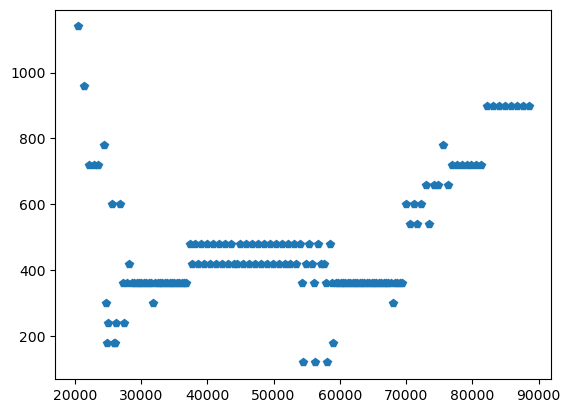

In [19]:
plt.plot(IntervalTimeBetweenVehicleList[0]['StartOfWaiting'],IntervalTimeBetweenVehicleList[0]['TimeInterval'],'p')

In [20]:
len(IntervalTimeBetweenVehicleList[0]['StartOfWaiting'])

150

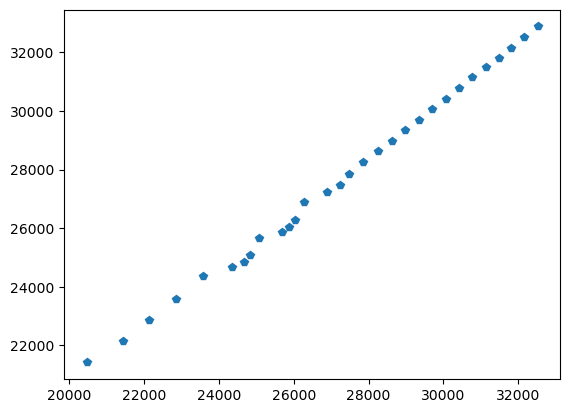

In [21]:
plt.plot(IntervalTimeBetweenVehicleList[0]['StartOfWaiting'][0:30],IntervalTimeBetweenVehicleList[0]['StartOfWaiting'][1:31],'p')

On peut commencer à essayer de faire des clusters pour regrouper les points ensembles ou d'autre techniques de regroupement, j'ai trouvés les infos des packages python sur https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python et aussi https://www.kaggle.com/code/arushchillar/kmeans-clustering-using-different-distance-metrics

In [22]:
#terminal command to install package with conda :

# conda install seaborn scikit-learn ipython
# conda install -c conda-forge kneed
# pip install pyclustering                      (Couldn't install via conda so I used pip)

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# cluster visualizer
#%matplotlib inline
#from yellowbrick.cluster import KElbowVisualizer 

# sklearn kmeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

A partir de maintenant je pique hontheusement le code trouvé sur https://www.kaggle.com/code/arushchillar/kmeans-clustering-using-different-distance-metrics

In [23]:
dataTestVS=ArrivalTimeVehiclesVSList[0]
dataTestInt = IntervalTimeBetweenVehicleList[0]
nCluster = 5
#Quick test
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=nCluster, random_state=10)

# call fit method with data 
km = km_model.fit_predict(dataTestVS)

# coordinates of cluster center
centroids = km_model.cluster_centers_ 

# cluster label for each data point
labels = km_model.labels_ 

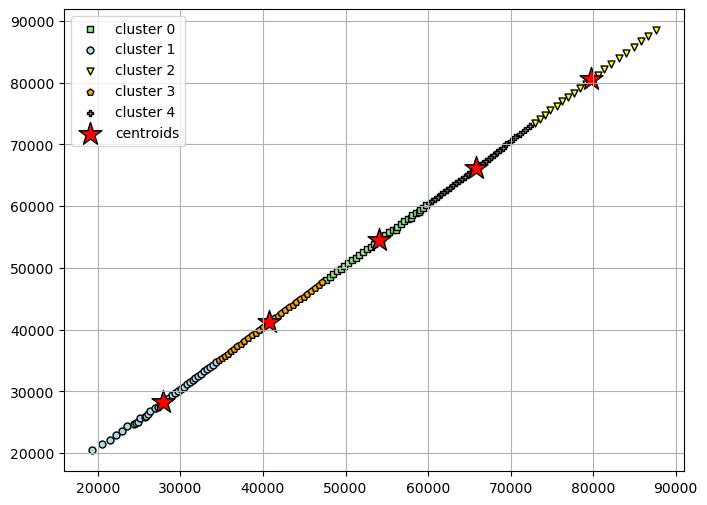

In [24]:

plt.figure(figsize=(8,6))
colors=['lightgreen','lightblue','yellow','orange','grey','violet']

markers=['s','o','v','p','P','x']

for n in range(nCluster):
    plt.scatter(
    dataTestVS[km == n]['Vehicle_i'], dataTestVS[km == n]['Vehicle_iPlus1'],
    s=25, c= colors[n],
    marker= markers[n], edgecolor='black',
    label='cluster '+str(n)
    )


# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

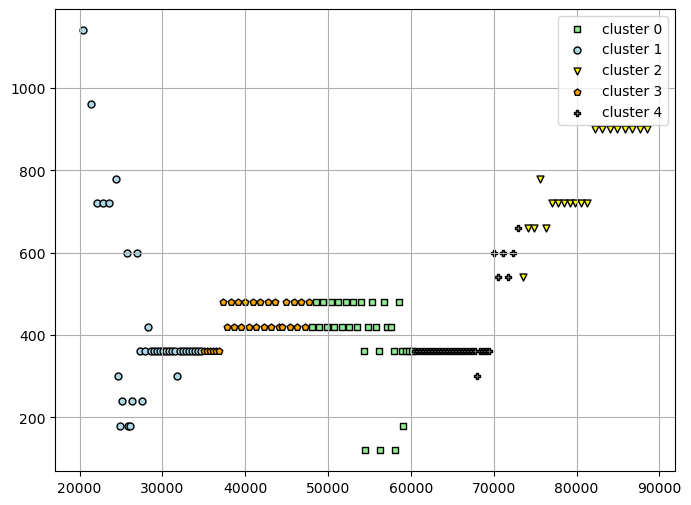

In [25]:
plt.figure(figsize=(8,6))
colors=['lightgreen','lightblue','yellow','orange','grey','violet']

markers=['s','o','v','p','P','x']

for n in range(nCluster):
    plt.scatter(
    dataTestInt[km == n]['StartOfWaiting'], dataTestInt[km == n]['TimeInterval'],
    s=25, c= colors[n],
    marker= markers[n], edgecolor='black',
    label='cluster '+str(n)
    )


# visualise centroids

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Bon voilà ici c'est pas encore le feu mais c'est parce qu'on travaille en distance euclidienne, ce qui n'a pas beaucoup de sens ici. On va essayer d'utiliser la métrique de Manhatan plutôt.
On va d'abord calculer le purity score (vérifier notion de cette distance)

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(
    IntervalTimeBetweenVehicle[km == 0]['StartOfWaiting'], IntervalTimeBetweenVehicle[km == 0]['TimeInterval'],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    IntervalTimeBetweenVehicle[km == 1]['StartOfWaiting'], IntervalTimeBetweenVehicle[km == 1]['TimeInterval'],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    IntervalTimeBetweenVehicle[km == 2]['StartOfWaiting'], IntervalTimeBetweenVehicle[km == 2]['TimeInterval'],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    IntervalTimeBetweenVehicle[km == 3]['StartOfWaiting'], IntervalTimeBetweenVehicle[km == 3]['TimeInterval'],
    s=25, c='orange',
    marker='v', edgecolor='black',
    label='cluster '
)


# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

ValueError: Item wrong length 150 instead of 127.

<Figure size 800x600 with 0 Axes>

In [27]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(IntervalTimeBetweenVehicle['TimeInterval'], labels)
print(f"The purity score is {round(purity*100, 2)}%")



ValueError: row, column, and data array must all be the same length

Faut pas être expert pour trouver que c'est dégeulasse, raison de plus de tenter avec une autre métrique

In [23]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def Clustering(dist_measure,nclust):
    initial_centers = random_center_initializer(IntervalTimeBetweenVehicle.values, nclust, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(IntervalTimeBetweenVehicle.values, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, IntervalTimeBetweenVehicle.values)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section

    return(pyClusters,pyCenters,purity_score(IntervalTimeBetweenVehicle['TimeInterval'].values, pyLabels))
    #return purity_score(IntervalTimeBetweenVehicle['TimeInterval'].values, pyLabels)

# print results
#for measure, value in distance_measures.items():
    #print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")


On peut maintenant essayer avec la distance de manhattan, ici avec 4 cluster différent 

In [24]:
Clusters = Clustering(distance_measures['manhattan'],4)[0]
Centers = Clustering(distance_measures['manhattan'],4)[1]
Centers

[[59350.27272727273, 1216.3636363636363],
 [30628.153846153848, 1297.3076923076924],
 [45763.0, 1200.0],
 [72815.71428571429, 1782.142857142857]]

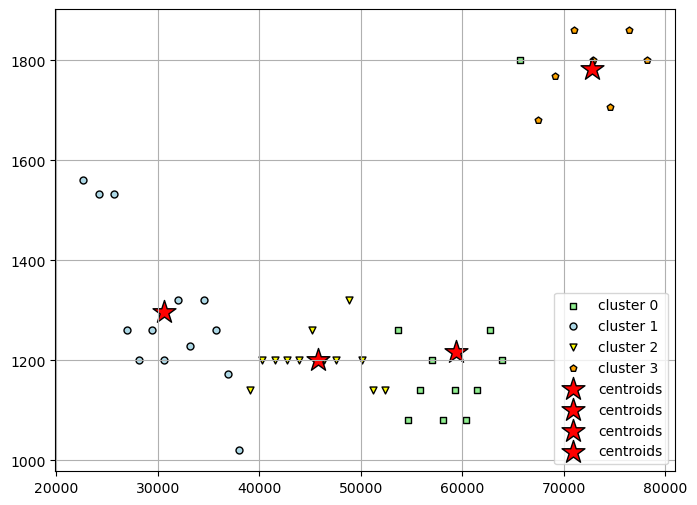

In [25]:
plt.figure(figsize=(8,6))

colors=['lightgreen','lightblue','yellow','orange','grey','violet']

markers=['s','o','v','p','P','x']

for i,cluster in enumerate(Clusters):
    plt.scatter(
        IntervalTimeBetweenVehicle.iloc[cluster,:1], IntervalTimeBetweenVehicle.iloc[cluster,1:],
        s=25, c=colors[i],
        marker=markers[i], edgecolor='black',
        label='cluster '+str(i)
    )


# visualise centroids
for center in Centers:
    plt.scatter(
        center[0],center[1],
        s=300, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Algorithme DBSCAN

In [89]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [115]:
db = DBSCAN(eps=50000, min_samples=15).fit(dataTestVS)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

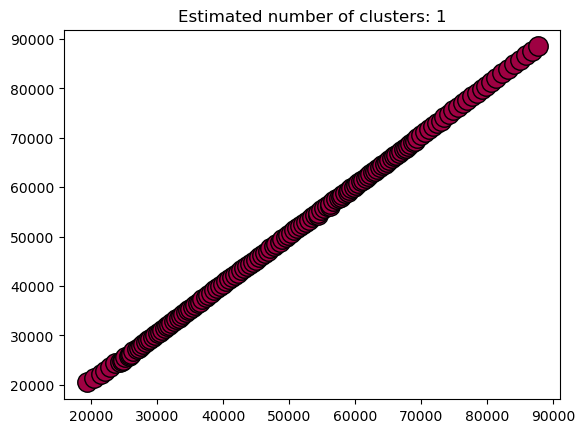

In [116]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colorsDBSCAN = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colorsDBSCAN):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = dataTestVS[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    xy = dataTestVS[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

On va essayer de faire ça avec le graphique de l'intervalle mtn

In [132]:
db = DBSCAN(eps=70000, min_samples=2).fit(dataTestInt)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

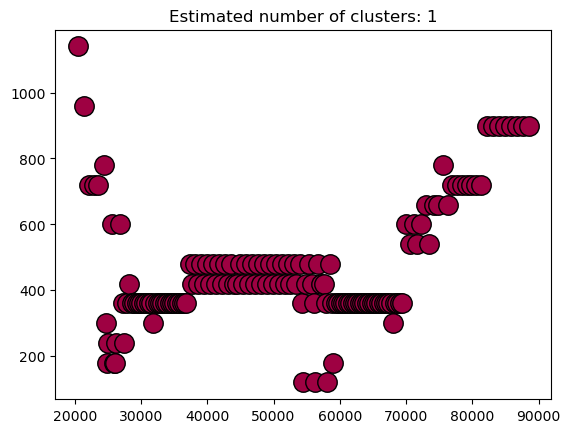

In [133]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colorsDBSCAN = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colorsDBSCAN):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = dataTestInt[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    xy = dataTestInt[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [28]:
stop_times.head(3)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,route_id,service_id,direction_id,shape_id,stop_code,stop_name,stop_desc,zone_id,stop_url,location_type,parent_station,geometry
0,113275577237259001,31920.0,31920.0,3107,1,0,0,17,237259001,0,069b0002,NaN,SCHAERBEEK GARE,NaN,NaN,NaN,0,NaN,POINT (4.37905 50.87764)
1,113275577237259001,31980.0,31980.0,3177,2,0,0,17,237259001,0,069b0002,NaN,SCHAERBEEK GARE,NaN,NaN,NaN,0,NaN,POINT (4.38019 50.87738)
2,113275577237259001,32043.0,32043.0,3171,3,0,0,17,237259001,0,069b0002,NaN,ZENOBE GRAMME,NaN,NaN,NaN,0,NaN,POINT (4.38416 50.87982)


In [34]:
ListOfStop=[]

for stop in stops['stop_id']:
    ListOfStop.append(stop)
DicOfStop={}



In [35]:
ListOfStop=ListOfStop[0:100]

for stop in ListOfStop:

    StopTimeTable = stop_times[stop_times['stop_id']==stop]
    ListOfServiceId = StopTimeTable['service_id'].unique()
    TripsStoppingAtStop = StopTimeTable['trip_id'].unique()  #All the trip_id that are passing by StopIdExample

    #Here the .unique() command shows us only once a trip_id
    #Now we identify the (possibly) different route that are passing by 

    RoutesContainingStopExample = [trips[trips['trip_id']==Trip]['route_id'].unique()[0] for Trip in TripsStoppingAtStop]
    #RoutesContainingStopExample = pd.DataFrame({'Routes':RoutesContainingStopExample})
    ListRoute=[]
    ListOfServiceId=StopTimeTable['service_id'].unique()
    for route in RoutesContainingStopExample:
        
        StopTimeTableRoute = StopTimeTable[StopTimeTable['route_id']==route]

        Directions=StopTimeTableRoute['direction_id'].unique()

        DicDirection={}
        
        for direction in Directions:

            DirecServ={}

            for service in ListOfServiceId:

                StopTimeTableRouteDirection=StopTimeTableRoute[(StopTimeTableRoute['direction_id']==direction)&(StopTimeTable['service_id']==service)]
                
                StopTimeTableRouteDirection=StopTimeTableRouteDirection[['arrival_time','departure_time']].sort_values('arrival_time') 

                DirecServ['service_id']=service
                DirecServ['TimeTable']=StopTimeTableRouteDirection

            DicDirection[direction]=DirecServ

        ListRoute.append({'ligne_id':route,'Direction':DicDirection})

    DicOfStop[stop]=ListRoute

In [38]:
ListOfStop[3]
#
DicOfStop['0472'][0]['Direction']

{1: {'service_id': '236965001',
  'TimeTable':         arrival_time  departure_time
  324094       17580.0         17580.0
  316973       19500.0         19500.0
  321887       20100.0         20100.0
  321908       20700.0         20700.0
  321929       21300.0         21300.0
  ...              ...             ...
  316742       84300.0         84300.0
  316763       85200.0         85200.0
  316784       86100.0         86100.0
  316805       87000.0         87000.0
  316826       87900.0         87900.0
  
  [175 rows x 2 columns]}}

In [ ]:
ListServiceId=[]
for stop in ListOfStop:
    ListServiceId.append(len(stop_times[stop_times['stop_id']==stop]['service_id'].unique()))

In [118]:
df = pd.read_table('calendar.txt',sep=',')
df.head()
DayOfWeek = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
df.head()

    


,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,234578052,1,1,1,1,1,0,0,20210823,20210831
1,236986502,0,0,0,0,0,1,0,20210828,20210828
2,236988602,0,0,0,0,0,0,1,20210829,20210829
3,236270000,1,1,1,1,1,0,0,20210901,20210917
4,236269500,0,0,0,0,0,1,0,20210904,20210918


In [119]:
calendarPierre={}
for i in range(31):
    date=801+i
    date=str(date)
    calendarPierre[date]=DayOfWeek[(i+6)%7]
for j in range(30):
    date=901+j
    date=str(date)
    calendarPierre[date]=DayOfWeek[(j+2)%7]

In [167]:
def FindDays(serviceId):
    dataframe=df[df['service_id']==serviceId]
    startdate=dataframe['start_date'].values-20210000
    enddate=dataframe['end_date'].values-20210000
    DaysOfValidity=[]
    for day in range(int(startdate),int(enddate)+1):
        key = str(day)
        
        calendarPierre[key]
        if dataframe[calendarPierre[str(day)]].values==1:
            DaysOfValidity.append(str(day))
    print(DaysOfValidity)

In [170]:
#type(df['service_id'].values[0])
FindDays(236986502)

['828']


In [123]:
df.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,234578052,1,1,1,1,1,0,0,20210823,20210831
1,236986502,0,0,0,0,0,1,0,20210828,20210828
2,236988602,0,0,0,0,0,0,1,20210829,20210829
3,236270000,1,1,1,1,1,0,0,20210901,20210917
4,236269500,0,0,0,0,0,1,0,20210904,20210918


In [107]:
calendar

[{'service_id': 234578052,
  'DaysOfValidity': [(20210823, '08'),
   (20210824, '08'),
   (20210825, '08'),
   (20210826, '08'),
   (20210827, '08'),
   (20210830, '08'),
   (20210831, '08')]},
 {'service_id': 236986502, 'DaysOfValidity': []},
 {'service_id': 236988602, 'DaysOfValidity': []},
 {'service_id': 236270000,
  'DaysOfValidity': [(20210901, '09'),
   (20210902, '09'),
   (20210903, '09'),
   (20210904, '09'),
   (20210905, '09'),
   (20210908, '09'),
   (20210909, '09'),
   (20210910, '09'),
   (20210911, '09'),
   (20210912, '09'),
   (20210915, '09'),
   (20210916, '09'),
   (20210917, '09')]},
 {'service_id': 236269500,
  'DaysOfValidity': [(20210909, '09'), (20210916, '09')]},
 {'service_id': 237269601, 'DaysOfValidity': []},
 {'service_id': 237476501, 'DaysOfValidity': []},
 {'service_id': 237566502, 'DaysOfValidity': []},
 {'service_id': 236892052,
  'DaysOfValidity': [(20210823, '08'),
   (20210824, '08'),
   (20210825, '08'),
   (20210826, '08'),
   (20210827, '08')]}